In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv("Cleaned_SNL_18650_LFP_15C_0-100_0.5-1C_a_timeseries.csv")
df['Cycle_Index'] = pd.to_numeric(df['Cycle_Index'])


In [128]:
err_idx=[] #For errornous indicies : Cycle number didn't got reset
miss_idx=[] #Missed Index
for i in range(1,len(df)-1):
    if (df['Current (A)'][i]==0 and df['Current (A)'][i+1]>0 and df['Current (A)'][i-1]<0 and (df['Cycle_Index'][i+1]==df['Cycle_Index'][i-1])):
        err_idx.append(i)
    if(df['Cycle_Index'][i+1]-df['Cycle_Index'][i]>1):
        miss_idx.append(i)


In [129]:
def relative_to_first(data_frame, column_name, i):
    col_data = data_frame[data_frame['Cycle_Index']==i+1][column_name]
    print(col_data.iloc[0])
    data_frame.loc[data_frame['Cycle_Index']==i+1,column_name] = col_data - col_data.iloc[0]

In [130]:
for i in miss_idx:
    df.loc[df.index >= i,'Cycle_Index'] = df.loc[df.index >= i,'Cycle_Index'] - 1
for i in err_idx:
    df.loc[df.index >= i,'Cycle_Index'] = df.loc[df.index >= i,'Cycle_Index'] + 1


In [131]:
t=df.groupby('Cycle_Index').first()['Charge_Capacity (Ah)']
nonzeroind =np.where(t>0.5)

In [132]:
for i in (nonzeroind[0]):
    relative_to_first(df, 'Charge_Capacity (Ah)', i)
    relative_to_first(df, 'Discharge_Capacity (Ah)', i)
    relative_to_first(df, 'Charge_Energy (Wh)', i)
    relative_to_first(df, 'Discharge_Energy (Wh)', i)

1.038
1.032
3.511
3.207
1.036
1.029
3.527
3.145
1.023
1.016
3.5
3.069
1.015
1.008
3.427
3.14
1.005
0.998
3.392
3.113
0.996
0.987
3.342
3.109
0.995
0.986
3.338
3.105
0.986
0.977
3.31
3.074
0.979
0.97
3.291
3.044
0.968
0.959
3.253
3.011


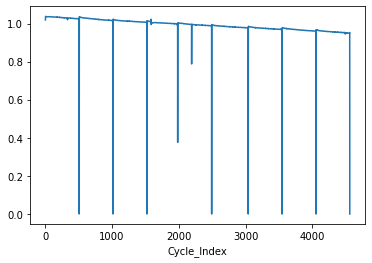

In [133]:
s = df.groupby('Cycle_Index')['Charge_Capacity (Ah)'].max()
s.plot()
plt.show()

In [134]:
idx_ls=[]
s = df.groupby('Cycle_Index')['Charge_Capacity (Ah)'].max()
thresh = s.mean()*(0.8)
s.drop(s.index[-1])
for i in range(len(s)):
    if (s.iloc[i]<thresh):
        idx_ls.append(i)


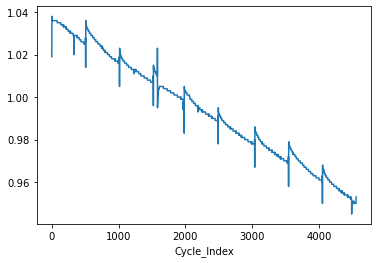

In [135]:
s.drop(s.index[idx_ls],inplace = True)
s.plot()
plt.show()